### House Price Prediction
1. What is the goal?
We want to predict how much a house will cost based on things like:
- square meters
- number of rooms
- zip code
- date of building
- interest rates
2. Why are we doing this?
- To help buyers know if the price is fair
- To help sellers price their homes better
- To help real estate agents give better advice
3. What we did:
- Cleaned the data 
- Turned text data into numbers using one-hot encoding
- Split the data into training and testing sets
- Tried 3 different models:
. Linear Regression
. Random Forest
. Decision Tree
4. What we found:
- Random Forest gave the best results
- Linear Regression was the least accurate
- The models learned how to predict house prices quite well
5. How We Can Use the Model to Predict House Prices
We developed a model that helps predict the cost of a house based on specific factors. Here's how each one works:
- Square Meters 
- Number of Rooms:
- Zip Code.
- Date of Building 
- Interest Rates.
6. How the Model Works:
The model uses all (size, number of rooms, location, age, and interest rates) to predict the price of a house. 
By entering information about a new house, the model will predict the price of a house
7. Practical Use:
- For Buyers: If you want to buy a house, this model can help you figure out if the price is fair based on those factors.
- For Sellers: If you’re selling your house, the model can help suggest a good price based on similar houses.
- For Real Estate Agents: Agents can use this model to help buyers and sellers set the right price.
The model helps predict the price of a house. This can make it easier for people to buy, sell, and price homes more fairly.

### Overfitting

Overfitting happens when a model does perfectly or very well on training data but fails to predict with new data as correctly on test data. 
We can spot it by comparing how well the model fits both the training and testing data in score i R² scores.

Overfitting is a big and normal problem in machine learning. It happens when a model learns the training data too good and well, to the point that it starts to capture noise or random fluctuations in the data rather than the underlying patterns. 
When this happens, the model performs almost very well on the training data but poorly on new test data. This happens because the model is too complex and has memorized the training data rather than generalizing from it.

### Hyperparameters
Hyperparameters are used to adjust the models complexity and improve generalization.
n_estimators in the RandomForestRegressor, we can set the number of trees in our forest.
We adjust this to "plant" more trees and simply put - the more trees the better performance, as more trees lead to more stable and accurate predictions.
The cons of adding more trees is, that training time takes longer.

By "planting" less trees, we have faster training and prediction times, but the model might not be able to capture enough patterns in the data.

### Preparing the Dataset

We have data from different cities in Denmark. In the following steps, we aim to prepare the dataset, including data cleaning and exploration.  

First, we create a DataFrame from the CSV file.


In [1]:
import pandas as pd
homes= pd.read_csv("DKHousingPricesSample100k.csv")
homes.head()


,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN


# **Preparing the Data**  

Before applying machine learning models, we need to prepare and clean the dataset. This includes:  
- Handling missing values  
- Converting data types  
- Removing duplicates and outliers  
- Encoding categorical variables  
- Splitting the dataset for training and testing  

### **1. Checking for Missing Values**  
We check for any missing values in the dataset:  


In [2]:
homes.count()


date                                   100000
quarter                                100000
house_id                               100000
house_type                             100000
sales_type                             100000
year_build                             100000
purchase_price                         100000
%_change_between_offer_and_purchase    100000
no_rooms                               100000
sqm                                    100000
sqm_price                              100000
address                                100000
zip_code                               100000
city                                    99989
area                                   100000
region                                 100000
nom_interest_rate%                     100000
dk_ann_infl_rate%                       99923
yield_on_mortgage_credit_bonds%         99923
dtype: int64

# **Data Cleaning and Feature Selection**

To optimize our dataset, we perform the following steps:

1. Drop the `city` column  
   - Since we have `zip_code`, the `city` column is redundant and can be removed.

2. Fill missing values for `dk_ann_infl_rate%` and `yield_on_mortgage_credit_bonds%` with their mean  
   - These columns contain 77 missing values. Instead of dropping them, we replace them with the mean value of each column.

### **1. Dropping Redundant Columns**
Since `zip_code` uniquely identifies locations, we remove the `city` column to avoid redundancy.



In [3]:
# Drop column City
homes = homes.drop(columns=['city'])
# Fill missing values in the two columns using the median
homes['dk_ann_infl_rate%'].fillna(homes['dk_ann_infl_rate%'].median(), inplace=True)
homes['yield_on_mortgage_credit_bonds%'].fillna(homes['yield_on_mortgage_credit_bonds%'].median(), inplace=True)
print(homes.isnull().sum())

date                                   0
quarter                                0
house_id                               0
house_type                             0
sales_type                             0
year_build                             0
purchase_price                         0
%_change_between_offer_and_purchase    0
no_rooms                               0
sqm                                    0
sqm_price                              0
address                                0
zip_code                               0
area                                   0
region                                 0
nom_interest_rate%                     0
dk_ann_infl_rate%                      0
yield_on_mortgage_credit_bonds%        0
dtype: int64


C:\Users\Rabee Abla\AppData\Local\Temp\ipykernel_14232\3556446165.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  homes['dk_ann_infl_rate%'].fillna(homes['dk_ann_infl_rate%'].median(), inplace=True)
C:\Users\Rabee Abla\AppData\Local\Temp\ipykernel_14232\3556446165.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

# **Handling large Range in `purchase_price`**

When we inspect the dataset with `.describe()`.
We notice that the `purchase_price` column has a large range, from: 
The minimum value (250,200) is 250 thousand.
The maximum value (45,955,000) is 45.96 million.
This large range suggests that there may be outliers or extreme values in the dataset, which could distort our analysis and model performance.

1. Checking the Description of the `purchase_price` Column  
First, we run the `.describe()` function to inspect the key statistics:



In [4]:
homes.dtypes
homes.describe()


,house_id,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,zip_code,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,7.531364e+05,1955.078530,1.925992e+06,-2.084740,4.375790,129.387820,16406.648074,5951.612680,1.679263,1.926966,4.107624
std,4.348902e+05,45.703585,1.777832e+06,4.852926,1.661686,57.170619,13655.184405,2369.938171,2.048078,1.637811,2.193592
min,1.300000e+01,1000.000000,2.502000e+05,-49.000000,1.000000,26.000000,374.549800,1051.000000,0.000000,0.250000,1.100000
25%,3.770722e+05,1931.000000,8.000000e+05,-3.000000,3.000000,89.000000,6792.940775,4000.000000,0.000000,0.790000,2.120000
50%,7.511035e+05,1966.000000,1.400000e+06,0.000000,4.000000,123.000000,12070.707000,5970.000000,0.750000,1.850000,4.340000
75%,1.128904e+06,1980.000000,2.450000e+06,0.000000,5.000000,160.000000,21343.201500,8250.000000,3.250000,2.340000,5.500000
max,1.507901e+06,2024.000000,4.595500e+07,49.000000,15.000000,984.000000,75000.000000,9990.000000,9.500000,7.700000,10.140000


# Visualizing Data

# *Data*

In this section, we will visualize the distribution of the `purchase_price` column in the dataset to better understand its underlying structure. 
The goal is to check if the data follows a normal distribution or if it is skewed. We will use two types of visualizations:
### **Why Use Logarithmic Scale?**
The `purchase_price` column has a wide range of values, from relatively low prices, 250,200 to very high prices, 45,955,000. 
When data has a wide range like this, it can be difficult to visualize patterns or trends using a linear scale,
because the large values dominate the plot.





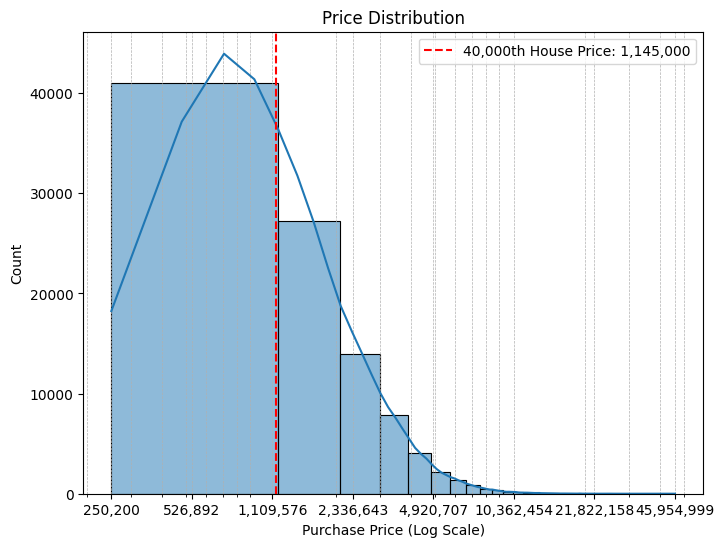

np.int64(45955000)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Create the plot
plt.figure(figsize=(8, 6))
sns.histplot(homes['purchase_price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Purchase Price (Log Scale)")
plt.ylabel("Count")
plt.xscale('log')

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)

min_price = homes['purchase_price'].min()
max_price = homes['purchase_price'].max()
ticks = np.logspace(np.log10(min_price), np.log10(max_price), num=8)

plt.xticks(ticks, [f'{int(x):,}' for x in ticks])

price_at_40k = 1145000  
plt.axvline(x=price_at_40k, color='red', linestyle='--', label=f'40,000th House Price: {price_at_40k:,}')

plt.legend()
plt.show()


# Normal values
normal_min = 250200
normal_max = 1109576

min_price = homes['purchase_price'].min()
max_price = homes['purchase_price'].max()

min_price
max_price


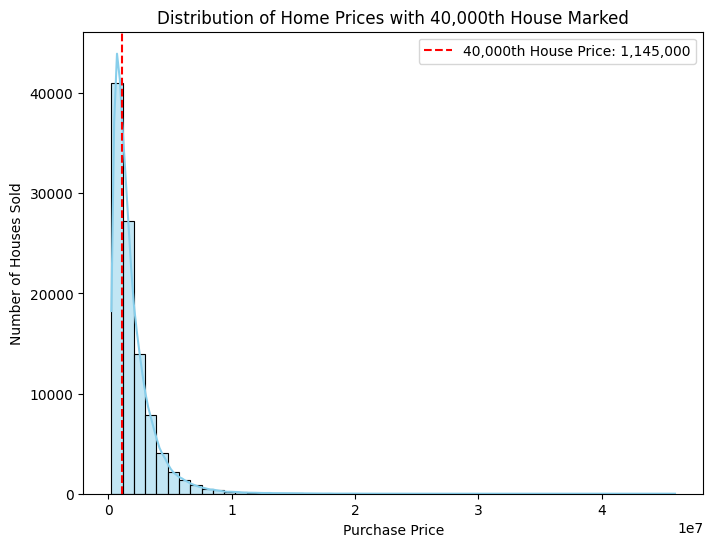

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(homes['purchase_price'], bins=50, kde=True, color="skyblue", edgecolor="black")

plt.axvline(x=price_at_40k, color='red', linestyle='--', label=f'40,000th House Price: {price_at_40k:,}')

plt.xlabel("Purchase Price")
plt.ylabel("Number of Houses Sold")
plt.title("Distribution of Home Prices with 40,000th House Marked")
plt.legend()

plt.show()




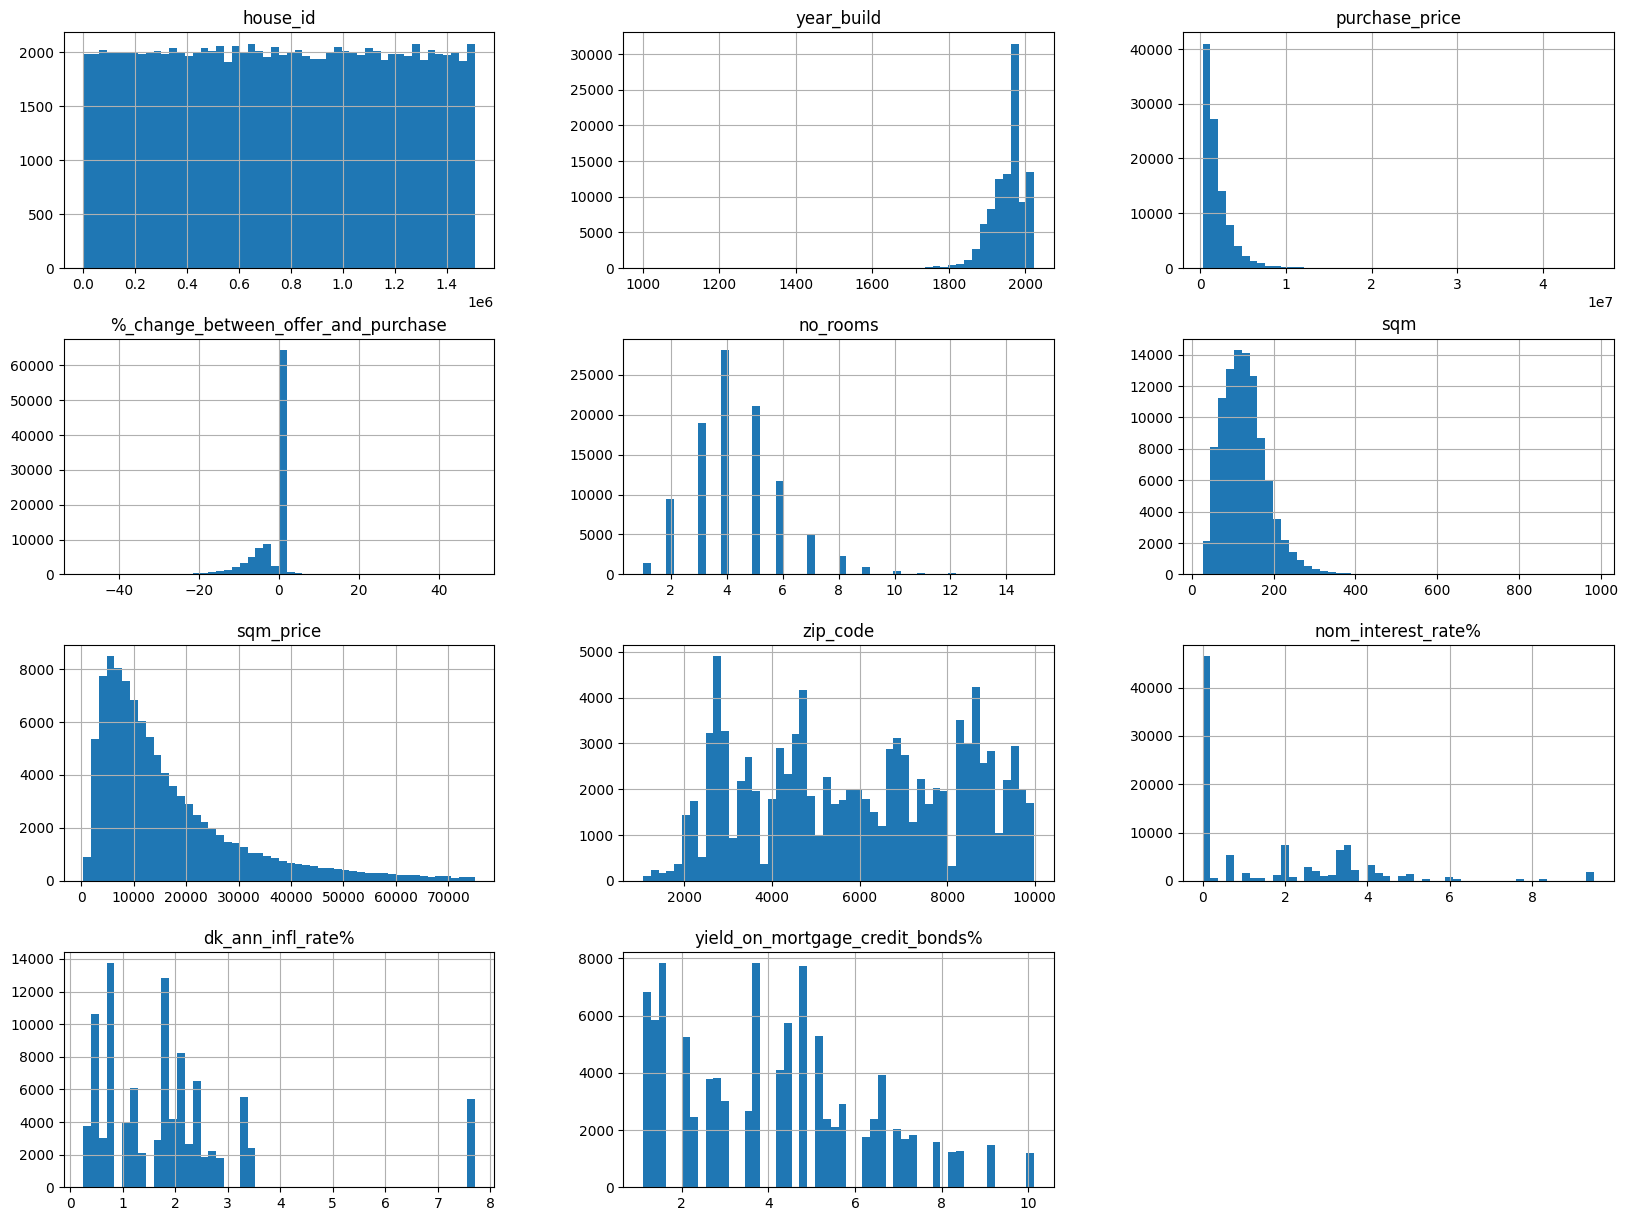

In [7]:
homes.hist(bins=50, figsize=(20, 15))
plt.show()

## Assessing Normality
1. Key Observations:
- Right-Skewed Distribution: The histogram clearly shows that house prices are heavily concentrated in the lower range, with most sales occurring 
below 1,109,576. The curve peaks around the lower price range and gradually tapers off as prices increase.
- Long Tail to the Right: The distribution has a long right tail, indicating that while most house prices are clustered at the lower end.
There are fewer but extremely high-priced houses in the data, which significantly extend the range of prices.
2. Does the Data Follow a Normal Distribution?
- Not Normal: From the visualizations, it is evident that the data does not follow a normal distribution. 
In a normal distribution, we would expect a bell-shaped curve, with most of the data clustered around the center.
- Right-Skewed: Instead of a bell curve, we observe a right-skewed distribution. 
This means that the majority of house prices are located in the lower ranges, with a long tail of high-value houses that skew the data to the right. 

3. Conclusion:
Based on the visualizations, it is clear that the purchase_price distribution is non-normal and right-skewed. 


### Handling Non-Normality in purchase_price
1. Identifying Outliers with a Boxplot

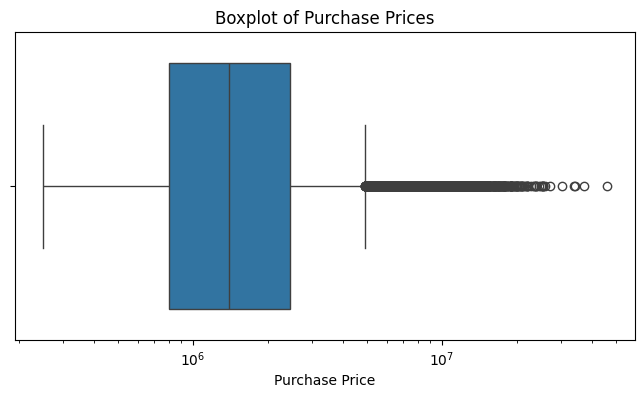

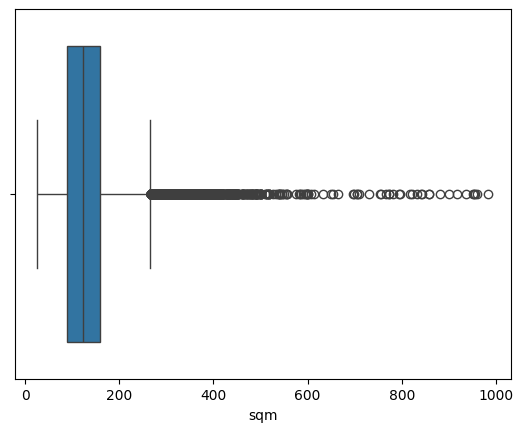

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=homes['purchase_price'])
plt.title("Boxplot of Purchase Prices")
plt.xlabel("Purchase Price")
plt.xscale('log') 
plt.show()

# Boxplot for other numeric columns if needed
sns.boxplot(x=homes['sqm'])
plt.show()


### Key Observations:
1. Most home prices are concentrated below 4,925,000.
2. There are a few extreme outliers above this threshold, reaching values as high as 45,955,000.

In [9]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = homes['purchase_price'].quantile(0.25)
Q3 = homes['purchase_price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = homes[(homes['purchase_price'] < lower_bound) | (homes['purchase_price'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers in `purchase_price`: {len(outliers)}")
homes_cleaned = homes[homes['purchase_price'] <= upper_bound]

# Show cleaned dataset
homes_cleaned.describe()




Number of outliers in `purchase_price`: 5576


,house_id,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,zip_code,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
count,9.442400e+04,94424.000000,9.442400e+04,94424.000000,94424.000000,94424.000000,94424.000000,94424.000000,94424.000000,94424.000000,94424.000000
mean,7.677764e+05,1955.527175,1.614444e+06,-2.107674,4.322418,126.833422,14696.337390,6036.244631,1.715893,1.917123,4.161391
std,4.342734e+05,44.794282,1.070239e+06,4.912233,1.624793,54.919077,11504.967625,2333.522529,2.066247,1.607751,2.206680
min,1.300000e+01,1000.000000,2.502000e+05,-49.000000,1.000000,26.000000,374.549800,1051.000000,0.000000,0.250000,1.100000
25%,3.952765e+05,1932.000000,7.750000e+05,-3.000000,3.000000,87.000000,6547.619000,4140.000000,0.000000,0.790000,2.120000
50%,7.737690e+05,1966.000000,1.325000e+06,0.000000,4.000000,121.000000,11379.311000,6040.000000,0.750000,1.850000,4.340000
75%,1.144292e+06,1980.000000,2.200000e+06,0.000000,5.000000,157.000000,19250.000000,8270.000000,3.250000,2.340000,5.500000
max,1.507898e+06,2024.000000,4.925000e+06,49.000000,15.000000,984.000000,75000.000000,9990.000000,9.500000,7.700000,10.140000


### Machine learning models
Before selecting a machine learning model we first need to analyze our dataset. 

In [10]:
homes_cleaned.columns

Index(['date', 'quarter', 'house_id', 'house_type', 'sales_type', 'year_build',
       'purchase_price', '%_change_between_offer_and_purchase', 'no_rooms',
       'sqm', 'sqm_price', 'address', 'zip_code', 'area', 'region',
       'nom_interest_rate%', 'dk_ann_infl_rate%',
       'yield_on_mortgage_credit_bonds%'],
      dtype='object')

In [11]:
homes_cleaned.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,"Capital, Copenhagen",Zealand,3.1,1.85,4.34
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,"Capital, Copenhagen",Zealand,3.1,1.85,4.34
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Other islands,Zealand,3.1,1.85,4.34
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,North Zealand,Zealand,3.1,1.85,4.34
5,2024-10-22,2024Q4,82,Villa,regular_sale,1858,1850000,0.0,5,154.0,12012.987,Lehnskovvej 220,5700,Fyn & islands,Fyn & islands,3.1,1.85,4.34


### Dropping Unnecessary Columns
We drop them because they are not useful for training a predictive model for house prices

In [12]:
homes_cleaned.drop(columns=['date', 'quarter', 'address', 'area', 'region'], inplace=True)
homes_cleaned.drop(columns=['house_id'], inplace=True)
homes_cleaned.columns
print(homes_cleaned.isnull().sum())

house_type                             0
sales_type                             0
year_build                             0
purchase_price                         0
%_change_between_offer_and_purchase    0
no_rooms                               0
sqm                                    0
sqm_price                              0
zip_code                               0
nom_interest_rate%                     0
dk_ann_infl_rate%                      0
yield_on_mortgage_credit_bonds%        0
dtype: int64


C:\Users\Rabee Abla\AppData\Local\Temp\ipykernel_14232\3501646276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes_cleaned.drop(columns=['date', 'quarter', 'address', 'area', 'region'], inplace=True)
C:\Users\Rabee Abla\AppData\Local\Temp\ipykernel_14232\3501646276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes_cleaned.drop(columns=['house_id'], inplace=True)


In [13]:
homes_cleaned.head()

,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,zip_code,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
1,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,1973,3.1,1.85,4.34
2,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,2680,3.1,1.85,4.34
3,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,4400,3.1,1.85,4.34
4,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,3520,3.1,1.85,4.34
5,Villa,regular_sale,1858,1850000,0.0,5,154.0,12012.987,5700,3.1,1.85,4.34


### Encoding Categorical Features
To prepare our data for machine learning models, we need to convert categorical variables into a numerical format. 
Most machine learning algorithms cannot handle non-numeric values directly.
We use pd.get_dummies() to perform one-hot encoding on the following categorical columns:
house_type
sales_type

In [14]:
# Apply One-Hot Encoding to categorical columns
homes_cleaned = pd.get_dummies(homes_cleaned, columns=['house_type', 'sales_type'], drop_first=True)
homes_cleaned.head()


,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,zip_code,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%,house_type_Farm,house_type_Summerhouse,house_type_Townhouse,house_type_Villa,sales_type_family_sale,sales_type_other_sale,sales_type_regular_sale
1,1885,3400000,0.0,2,46.0,73913.050,1973,3.1,1.85,4.34,False,False,False,False,False,False,True
2,1949,4550000,-4.0,4,112.0,40625.000,2680,3.1,1.85,4.34,False,False,False,True,False,False,True
3,2001,1630000,-12.0,4,186.0,8763.440,4400,3.1,1.85,4.34,False,False,False,True,False,False,True
4,1965,1975000,-10.0,3,82.0,24085.365,3520,3.1,1.85,4.34,False,False,False,False,False,False,True
5,1858,1850000,0.0,5,154.0,12012.987,5700,3.1,1.85,4.34,False,False,False,True,False,False,True


In [15]:
# Separate features (X) and target (y)
X = homes_cleaned.drop(columns=['purchase_price'])
y = homes_cleaned['purchase_price']

In [16]:
X.head()

,year_build,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,zip_code,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%,house_type_Farm,house_type_Summerhouse,house_type_Townhouse,house_type_Villa,sales_type_family_sale,sales_type_other_sale,sales_type_regular_sale
1,1885,0.0,2,46.0,73913.050,1973,3.1,1.85,4.34,False,False,False,False,False,False,True
2,1949,-4.0,4,112.0,40625.000,2680,3.1,1.85,4.34,False,False,False,True,False,False,True
3,2001,-12.0,4,186.0,8763.440,4400,3.1,1.85,4.34,False,False,False,True,False,False,True
4,1965,-10.0,3,82.0,24085.365,3520,3.1,1.85,4.34,False,False,False,False,False,False,True
5,1858,0.0,5,154.0,12012.987,5700,3.1,1.85,4.34,False,False,False,True,False,False,True


In [17]:
y.head()

1    3400000
2    4550000
3    1630000
4    1975000
5    1850000
Name: purchase_price, dtype: int64

### Split the data into training and testing sets (80% train, 20% test)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.dtypes)


year_build                               int64
%_change_between_offer_and_purchase    float64
no_rooms                                 int64
sqm                                    float64
sqm_price                              float64
zip_code                                 int64
nom_interest_rate%                     float64
dk_ann_infl_rate%                      float64
yield_on_mortgage_credit_bonds%        float64
house_type_Farm                           bool
house_type_Summerhouse                    bool
house_type_Townhouse                      bool
house_type_Villa                          bool
sales_type_family_sale                    bool
sales_type_other_sale                     bool
sales_type_regular_sale                   bool
dtype: object


### R² is used to assess the goodness of fit, and MSE is used to assess the magnitude of prediction error.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict house prices using the trained model
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test) 
# R-squared score
r2 = r2_score(y_test, y_pred)  
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)  

print("R² score:", r2)
print("Mean Squared Error:", mse)


R² score: 0.8039404522746745
Mean Squared Error: 224919306424.94937


###
R² score: 0.8039: 
This means your model explains about 80.4% of the variance in the house prices. 
This is a strong indicator of how well your model fits the data.
The model is predicting quite well, but it's not perfect (R² = 1 would indicate perfect predictions).
MSE: 224,919,306,424.95: The MSE represents the magnitude of the average squared error. 
While it is large in raw terms, what matters more is its comparison to other models or the context of the price range you're working with.
The large MSE is normal in many real estate data sets, but it could indicate that the predictions have large errors, 
especially if the prices range from low to very high values.

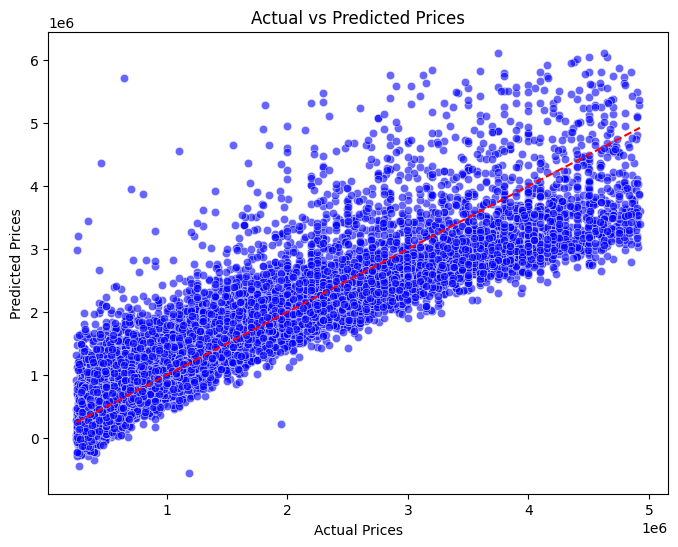

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()




### Explanation:
1. If all points on your scatter plot are near the red line, it means the model is making good predictions. 
2. If the points are far from the red line, it means the model's predictions are not as good in predictions


### Random Forest Regression
Random Forest is a collection of many decision trees. 
Each tree might make different predictions based on different data points and features. 
but when combined, they give a more stable and accurate result.

In [25]:
from sklearn.ensemble import RandomForestRegressor
# Initializing the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² score: {r2}")
print(f"Mean Squared Error: {mse}")


R² score: 0.9998190945848482
Mean Squared Error: 207534501.5151419


### Conclusion: 
The model is doing well at predicting house prices. 
The R² score of 0.9998 is almost perfect.The result means we done a great job with our data. 

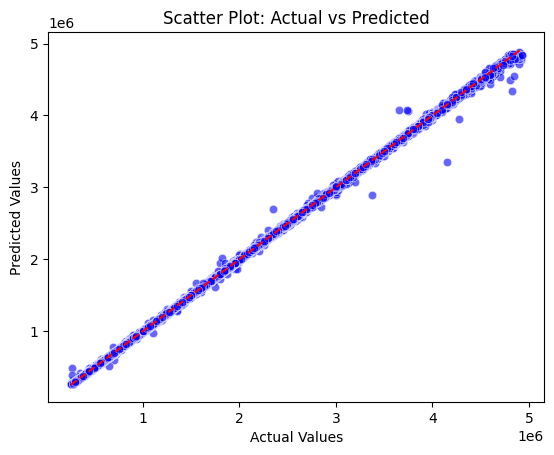

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted')

plt.show()

In [28]:
### Test Overfitting
from sklearn.metrics import r2_score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")



Training R²: 0.9999754007663781
Testing R²: 0.9998190945848482


### Conclusion:
The model is performing very good and have a very high R² scores for both training and testing data. 

### Explanation:
The scatter plot show the blue dots are close to the red dashed line. 
It means the model is almost perfect at predicting the house prices, showing minimal errors.

### Decision Tree Regression
It's like a flowchart for making predictions, where each decision helps narrow down the possibilities until we reach an answer.
The tree splits data at different points based on the values of features. 
and this process continues until the model is as simple as possible

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

# Evaluate the model
r2_score_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Print results
print(f"Decision Tree - R² score: {r2_score_dt}")
print(f"Decision Tree - Mean Squared Error: {mse_dt}")


Decision Tree - R² score: 0.999134901040329
Decision Tree - Mean Squared Error: 992440614.3727297


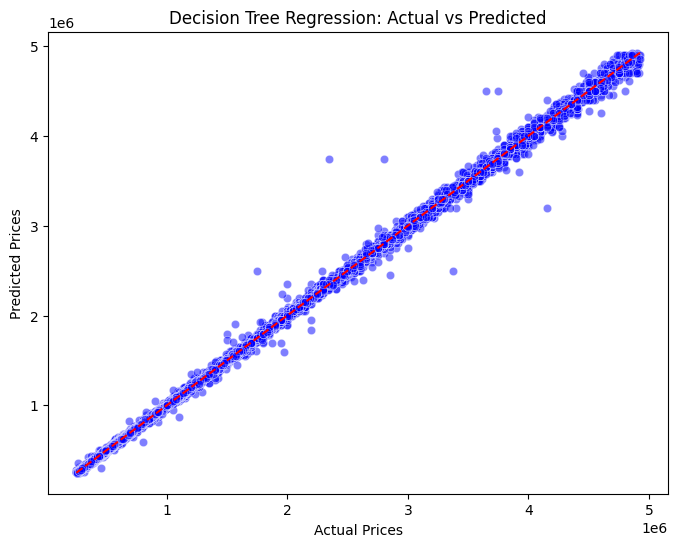

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### Decision Tree Regression – Summary
R² Score: 0.9991
This means the model explains 99.91% of the variation in house prices — a very high level of accuracy.
Mean Squared Error (MSE): 992,440,614
The average squared difference between predicted and actual house prices is quite low, which is a good sign.